In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 전처리

## 파일 로드

In [2]:
df1 = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_22.03.csv')
df2 = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_22.06.csv')
df3 = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_22.09.csv')
df4 = pd.read_csv('./서울특별시 공공자전거 대여이력 정보_2212.csv')


df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [3]:
# "\N" 값을 가진 행 제거
df = df[df['반납대여소번호'] != "\\N"]

In [4]:
df['반납대여소번호'] = df['반납대여소번호'].astype(int)

## 일시 데이터를 날짜 / 시간으로 분리

In [5]:
df[['대여 날짜', '대여 시간']] = df['대여일시'].str.split(' ', expand=True)
df[['반납 날짜', '반납 시간']] = df['반납일시'].str.split(' ', expand=True)

## 대여 요일 / 반납 요일 추출

In [6]:
# 대여 날짜, 반납 날짜로부터 요일 추출
# 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)
df['대여 날짜'] = pd.to_datetime(df['대여 날짜'])
df['대여 요일'] = df['대여 날짜'].dt.dayofweek

df['반납 날짜'] = pd.to_datetime(df['반납 날짜'])
df['반납 요일'] = df['반납 날짜'].dt.dayofweek

## 시간 추출

In [7]:
# time의 int 속성에 따라 시간만 추출
df['대여 시간'] = df['대여 시간'].str.split(':').str[0].astype(int)
df['반납 시간'] = df['반납 시간'].str.split(':').str[0].astype(int)

In [8]:
# 2시간을 하나의 time으로 묶음
df['대여 시간'] = df['대여 시간'] // 2
df['반납 시간'] = df['반납 시간'] // 2

In [9]:
df.sample(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,성별,이용자종류,대여대여소ID,반납대여소ID,대여 날짜,대여 시간,반납 날짜,반납 시간,대여 요일,반납 요일
13020308,SPB-41413,2022-12-25 17:51:38,1182,KBS 스포츠월드,0,2022-12-25 18:04:00,1197,엠펠리체 호텔 건너편,0,NaN,...,M,내국인,ST-1519,ST-1714,2022-12-25,8,2022-12-25,9,6,6
3290869,SPB-80141,2022-06-20 23:35:59,660,동의보감타워,99,2022-06-20 23:41:12,659,제기역1번출구,99,5.0,...,NaN,NaN,NaN,NaN,2022-06-20,11,2022-06-20,11,0,0
10006645,SPB-34022,2022-09-22 21:39:17,3500,군자역2번출구,0,2022-09-22 21:57:23,1452,겸재교 진입부,0,NaN,...,M,내국인,ST-983,ST-1335,2022-09-22,10,2022-09-22,10,3,3
13206193,SPB-30863,2022-12-29 07:37:56,1841,가산동 주민센터,0,2022-12-29 07:43:26,1830,빅마켓 금천점 앞,0,NaN,...,F,내국인,ST-1142,ST-637,2022-12-29,3,2022-12-29,3,3,3
607646,SPB-47020,2022-03-11 18:36:02,735,영도초등학교,0,2022-03-11 20:02:50,747,목동3단지 상가,0,86.0,...,NaN,NaN,NaN,NaN,2022-03-11,9,2022-03-11,10,4,4


## 강서구 대여소 데이터만 추출

In [10]:
df_master = pd.read_csv('./공공자전거 대여소 정보(22.12월 기준).csv')

In [11]:
df_master = df_master.iloc[4:, :7]
df_master.columns = ['대여소 번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치 시기']

df_master['대여소 번호'] = df_master['대여소 번호'].astype(int)
df_master[['위도', '경도']] = df_master[['위도', '경도']].astype(float)

df_master['설치 시기'] = pd.to_datetime(df_master['설치 시기']).dt.strftime('%Y%m%d').astype(int)

# '자치구 명이 강서구인 대여소만 추출
df_master = df_master[df_master['자치구'] == '강서구']

In [12]:
df_master

,대여소 번호,대여소명,자치구,상세주소,위도,경도,설치 시기
773,1101,개화동상사마을종점 버스정류장,강서구,서울특별시 강서구 개화동로5길 3-8,37.581612,126.798599,20170424
774,1102,방화사거리 마을버스 버스정류장,강서구,서울특별시 강서구 양천로17길 6,37.573643,126.811806,20170424
775,1103,방화역 4번출구앞,강서구,서울특별시 강서구 금낭화로 135,37.577106,126.811997,20170622
776,1105,방화근린공원,강서구,서울특별시 강서구 금낭화로 176,37.581623,126.812653,20170424
777,1106,신방화사거리,강서구,서울특별시 강서구 방화대로 342,37.573032,126.816452,20170620
...,...,...,...,...,...,...,...
2674,5088,등촌역 센터스퀘어,강서구,염창동312,37.550648,126.866165,20220829
2675,5089,LG사이언스파크 E10동,강서구,마곡동 788-5,37.563648,126.834541,20220829
2676,5090,대상연구소,강서구,마곡동762-4,37.569809,126.828575,20220914
2677,5091,보타닉파크타워2,강서구,마곡동774-2,37.559486,126.831314,20220929


## df의 rental, retrun 수량 확인

In [13]:
# 원본 데이터에서 강서구에 포함된 대여소의 데이터만 추출
# 대여와 반납 둘 중 하나라도 강서구 대여소가 포함되어 있다면 남김
filtered_df = df[df['대여 대여소번호'].isin(df_master['대여소 번호']) | df['반납대여소번호'].isin(df_master['대여소 번호'])]

In [14]:
filtered_df = filtered_df[['대여 대여소번호', '반납대여소번호', '대여 날짜', '대여 시간', '반납 날짜', '반납 시간', '대여 요일', '반납 요일']]

# 대여 대여소번호를 기준으로 대여량을 추출
rental_count = filtered_df.groupby(['대여 대여소번호', '대여 날짜', '대여 시간']).size().reset_index(name='대여량')


rental_count = rental_count.reindex(columns=['대여 날짜', '대여 시간', '대여 대여소번호', '대여량'])
rental_count = rental_count.sort_values(by=['대여 날짜', '대여 시간', '대여 대여소번호'])

# 속성 이름 변경
rental_count.rename(columns={'대여 날짜': 'date'}, inplace=True)
rental_count.rename(columns={'대여 시간': 'time'}, inplace=True)
rental_count.rename(columns={'대여 대여소번호': 'station'}, inplace=True)

rental_count

,date,time,station,대여량
2373,2022-03-01,0,175,1
13159,2022-03-01,0,399,1
15979,2022-03-01,0,700,1
16984,2022-03-01,0,701,1
17872,2022-03-01,0,703,1
...,...,...,...,...
265303,2022-12-31,11,5080,4
265939,2022-12-31,11,5082,2
266502,2022-12-31,11,5084,1
267979,2022-12-31,11,5088,2


In [15]:
# rental_count 중 강서구에 있는 대여소 데이터만 추출
rental_count = rental_count[rental_count['station'].isin(df_master['대여소 번호'])]

In [16]:
filtered_return_df = filtered_df[filtered_df['반납대여소번호'].isin(df_master['대여소 번호'])]

# # 반납대여소번호를 기준으로 반납량을 추출
return_count = filtered_return_df.groupby(['반납대여소번호', '반납 날짜', '반납 시간']).size().reset_index(name='반납량')

return_count = return_count.reindex(columns=['반납 날짜', '반납 시간', '반납대여소번호', '반납량'])
return_count = return_count.sort_values(by=['반납 날짜', '반납 시간', '반납대여소번호'])

# 속성 이름 변경
return_count.rename(columns={'반납 날짜': 'date'}, inplace=True)
return_count.rename(columns={'반납 시간': 'time'}, inplace=True)
return_count.rename(columns={'반납대여소번호': 'station'}, inplace=True)

return_count

,date,time,station,반납량
6457,2022-03-01,0,1109,1
8150,2022-03-01,0,1111,1
9367,2022-03-01,0,1112,3
13234,2022-03-01,0,1118,1
14556,2022-03-01,0,1119,1
...,...,...,...,...
177243,2023-01-01,0,5053,1
192476,2023-01-01,0,5073,2
194862,2023-01-01,0,5075,1
196775,2023-01-01,0,5080,1


In [17]:
# date에서 3, 6, 9, 12월에 포함되지 않은 날은 제외
exclude_dates = ['2022-04-01', '2022-07-01', '2022-10-01', '2023-01-01']
return_count = return_count[~return_count['date'].isin(exclude_dates)]

In [18]:
# rental_count, return_count 데이터를 병합함
final_df1 = pd.merge(rental_count, return_count, on=['date', 'time', 'station'], how='outer')

In [19]:
final_df1 = final_df1[final_df1['station'].isin(df_master['대여소 번호'])]
final_df1[['대여량', '반납량']] = final_df1[['대여량', '반납량']].fillna(0)

In [20]:
final_df1.sample(5)

,date,time,station,대여량,반납량
172559,2022-12-12,11,1103,2.0,5.0
57651,2022-06-07,4,5065,14.0,3.0
30489,2022-03-21,10,2729,5.0,2.0
205122,2022-03-20,11,1174,0.0,1.0
13995,2022-03-10,6,2728,10.0,4.0


## 거치 가능 수량 확인

In [21]:
df_count = pd.read_csv('./공공자전거 대여소 정보(22.12월 기준)_거치대수.csv')

df_count = df_count.iloc[2:,:9]
df_count.columns = ['대여소 번호', '대여소명','자치구','상세주소','위도','경도','설치 시기', 'LCD 거치대 수', 'QR 거치대 수']

df_count = df_count[df_count['자치구']=='강서구']
df_count = df_count[['대여소 번호','LCD 거치대 수','QR 거치대 수']]

df_count[['LCD 거치대 수','QR 거치대 수']] = df_count[['LCD 거치대 수','QR 거치대 수']].fillna(0)

df_count = df_count.astype(int)

# 각 대여소 별 거치대 수를 뽑음
df_count['거치대 수'] = df_count['LCD 거치대 수'] + df_count['QR 거치대 수']

df_count['거치대 수'] = df_count['거치대 수'].astype(int)
df_count = df_count.reset_index()

df_count = df_count[['대여소 번호','거치대 수']]

df_count.sample(5)

,대여소 번호,거치대 수
67,1188,8
186,5091,8
140,3783,10
36,1152,30
132,3775,10


## 날씨 데이터

In [22]:
df3 = pd.read_csv('./날씨데이터_3월.csv')
df6 = pd.read_csv('./날씨데이터_6월.csv')
df9 = pd.read_csv('./날씨데이터_9월.csv')
df12 = pd.read_csv('./날씨데이터_12월.csv')

# 각 속성의 타입 변환 및 결측치 0으로 채움
def column_change(df):
    
    #속성 변환
    df['일시'] = pd.to_datetime(df['일시'])
    df['날짜'] = pd.to_datetime(df['일시'].dt.date)
    df['시간'] = df['일시'].dt.hour
    
    #null 채우기
    df['기온(°C)'] = df['기온(°C)'].fillna(0)
    df['강수량(mm)'] = df['강수량(mm)'].fillna(0)

    # 지점과 지점명 컬럼 삭제
    df = df.drop(columns=['지점', '지점명', '일시'])
    
    return df


# 각 속성을 2시간의 평균으로 합침
def mean_for_time(df):
    new_df = {
        '날짜': [],
        '시간': [],
        '기온(°C)': [],
        '강수량(mm)': []
    }
    
    for i in range(0, len(df), 2):
        date = df.iloc[i]['날짜']
        hour = int(df.iloc[i]['시간']/2)
        
        #평균 계산
        mean_temp = df.iloc[i:i+2]['기온(°C)'].mean()
        mean_rain = df.iloc[i:i+2]['강수량(mm)'].mean()
        
        new_df['날짜'].append(date)
        new_df['시간'].append(hour)
        new_df['기온(°C)'].append(mean_temp)
        new_df['강수량(mm)'].append(mean_rain)
        
    return pd.DataFrame(new_df)


# 함수 적용
df3 =column_change(df3)
df3= mean_for_time(df3)

df6 =column_change(df6)
df6= mean_for_time(df6)

df9 =column_change(df9)
df9= mean_for_time(df9)

df12 =column_change(df12)
df12= mean_for_time(df12)

# 합치기
df_weather = pd.concat([df3, df6, df9, df12], ignore_index = True)

df_weather.sample(5)

,날짜,시간,기온(°C),강수량(mm)
728,2022-06-30,8,21.75,8.65
1050,2022-09-27,6,25.35,0.00
583,2022-06-18,7,24.00,0.00
57,2022-03-05,9,3.35,0.00
493,2022-06-11,1,18.50,0.00


## 공휴일, 계절 데이터

In [23]:
# 날짜, 시간
month3 = pd.date_range(start='2022-03-01', end='2022-03-31', freq='D')
month6 = pd.date_range(start='2022-06-01', end='2022-06-30', freq='D')
month9 = pd.date_range(start='2022-09-01', end='2022-09-30', freq='D')
month12 = pd.date_range(start='2022-12-01', end='2022-12-31', freq='D')

month = pd.concat([pd.Series(month3), pd.Series(month6), pd.Series(month9), pd.Series(month12)], ignore_index=True)

time_intervals = list(range(0, 12))

date_time = [(date, time) for date in month for time in time_intervals]

df_holiday = pd.DataFrame(date_time, columns=['날짜', '시간'])

# 공휴일
holidays = pd.to_datetime([
    '2022-03-01','2022-03-09', '2022-06-01','2022-06-06', '2022-09-28', '2022-09-29', '2022-09-30', '2022-12-25'
])

df_holiday['공휴일'] = df_holiday['날짜'].isin(holidays).astype(int)

# 계절
def season(date):
    if date.month in [3, 4, 5]:
        return 0  # 봄
    elif date.month in [6, 7, 8]:
        return 1  # 여름
    elif date.month in [9, 10, 11]:
        return 2  # 가을
    else:
        return 3  # 겨울

df_holiday['계절'] = df_holiday['날짜'].apply(season)

df_holiday.sample(5)

,날짜,시간,공휴일,계절
363,2022-03-31,3,0,0
780,2022-09-05,0,0,2
25,2022-03-03,1,0,0
827,2022-09-08,11,0,2
1438,2022-12-29,10,0,3


## 합치기

In [24]:
df_merged = pd.merge(df_weather, df_holiday, on=['날짜', '시간'])

df_merged

,날짜,시간,기온(°C),강수량(mm),공휴일,계절
0,2022-03-01,0,7.10,0.00,1,0
1,2022-03-01,1,7.20,0.00,1,0
2,2022-03-01,2,6.25,0.00,1,0
3,2022-03-01,3,5.70,0.85,1,0
4,2022-03-01,4,5.85,0.30,1,0
...,...,...,...,...,...,...
1459,2022-12-31,7,1.60,0.00,0,3
1460,2022-12-31,8,1.90,0.00,0,3
1461,2022-12-31,9,0.20,0.00,0,3
1462,2022-12-31,10,-0.90,0.00,0,3


In [25]:
rental_office_info = pd.read_csv('./공공자전거 대여소 정보(22.12월 기준).csv')

rental_office_info['설치시기'] = pd.to_datetime(rental_office_info['설치시기'], format='%Y.%m.%d') # 연산용 format 변경

rental_office_info = rental_office_info[rental_office_info['위치'].str.contains('강서구')]

df_merged['날짜'] = pd.to_datetime(df_merged['날짜'], format='%Y-%m-%d')

unique_months = df_merged['날짜'].dt.to_period('M').drop_duplicates().sort_values()

expanded_df_list = []

# 날짜, 시간 별로 객체 만들기
for period in unique_months:
    period_start = period.start_time
    period_df = df_merged[df_merged['날짜'].dt.to_period('M') == period]

    valid_stations = rental_office_info[rental_office_info['설치시기'] < period_start]

    expanded_period_df = pd.merge(period_df[['날짜', '시간']], valid_stations[['대여소 번호']], how='cross')
    expanded_period_df = pd.merge(expanded_period_df, period_df, on=['날짜', '시간'], how='left')

    expanded_df_list.append(expanded_period_df)

df_merged_expanded = pd.concat(expanded_df_list, ignore_index=True)

df_merged_expanded

,날짜,시간,대여소 번호,기온(°C),강수량(mm),공휴일,계절
0,2022-03-01,0,1101,7.1,0.0,1,0
1,2022-03-01,0,1102,7.1,0.0,1,0
2,2022-03-01,0,1103,7.1,0.0,1,0
3,2022-03-01,0,1105,7.1,0.0,1,0
4,2022-03-01,0,1106,7.1,0.0,1,0
...,...,...,...,...,...,...,...
266083,2022-12-31,11,5087,-0.5,0.0,0,3
266084,2022-12-31,11,5088,-0.5,0.0,0,3
266085,2022-12-31,11,5089,-0.5,0.0,0,3
266086,2022-12-31,11,5090,-0.5,0.0,0,3


In [26]:
# 날짜, 시간 별 대여소를 불러옴
rental_office_info['설치시기'] = pd.to_datetime(rental_office_info['설치시기'], format='%Y.%m.%d')

rental_office_info = rental_office_info[rental_office_info['위치'].str.contains('강서구')]

df_merged['날짜'] = pd.to_datetime(df_merged['날짜'], format='%Y-%m-%d')

unique_months = df_merged['날짜'].dt.to_period('M').drop_duplicates().sort_values()

expanded_df_list = []

for period in unique_months:
    period_end = period.end_time
    period_df = df_merged[df_merged['날짜'].dt.to_period('M') == period]
    valid_stations = rental_office_info[rental_office_info['설치시기'] <= period_end]
    expanded_period_df = pd.merge(period_df[['날짜', '시간']], valid_stations[['대여소 번호']], how='cross')
    expanded_period_df = pd.merge(expanded_period_df, period_df, on=['날짜', '시간'], how='left')
    expanded_df_list.append(expanded_period_df)
    
df_merged_expanded = pd.concat(expanded_df_list, ignore_index=True)
clms = ['date', 'time', 'station', 'temp', 'prec', 'holiday', 'season']
df_merged_expanded.columns = clms

df_merged_expanded.tail()

,date,time,station,temp,prec,holiday,season
267895,2022-12-31,11,5088,-0.5,0.0,0,3
267896,2022-12-31,11,5089,-0.5,0.0,0,3
267897,2022-12-31,11,5090,-0.5,0.0,0,3
267898,2022-12-31,11,5091,-0.5,0.0,0,3
267899,2022-12-31,11,5094,-0.5,0.0,0,3


In [27]:
df_merged_expanded['day'] = df_merged_expanded['date'].dt.dayofweek

In [28]:
df_merged_expanded

,date,time,station,temp,prec,holiday,season,day
0,2022-03-01,0,1101,7.1,0.0,1,0,1
1,2022-03-01,0,1102,7.1,0.0,1,0,1
2,2022-03-01,0,1103,7.1,0.0,1,0,1
3,2022-03-01,0,1105,7.1,0.0,1,0,1
4,2022-03-01,0,1106,7.1,0.0,1,0,1
...,...,...,...,...,...,...,...,...
267895,2022-12-31,11,5088,-0.5,0.0,0,3,5
267896,2022-12-31,11,5089,-0.5,0.0,0,3,5
267897,2022-12-31,11,5090,-0.5,0.0,0,3,5
267898,2022-12-31,11,5091,-0.5,0.0,0,3,5


## 대여량만 고려한 데이터

In [29]:
final_df_count = pd.merge(df_merged_expanded, rental_count, on=['date', 'time', 'station'], how='outer')

In [30]:
final_df_count['대여량'] = final_df_count['대여량'].fillna(0)
final_df_count.rename(columns={'대여량': 'target data'}, inplace=True)

In [31]:
final_df_count.sample(10)

,date,time,station,temp,prec,holiday,season,day,target data
67271,2022-06-01,7,5064,28.35,0.00,1,1,2,10.0
234362,2022-12-17,1,2743,-8.10,0.00,0,3,5,0.0
215837,2022-12-08,11,1119,2.85,0.00,0,3,3,5.0
785,2022-03-01,4,1199,5.85,0.30,1,0,1,0.0
221309,2022-12-11,4,1149,-1.25,0.00,0,3,6,5.0
248873,2022-12-23,6,3789,-9.95,0.00,0,3,4,0.0
51399,2022-03-25,2,1191,6.60,0.00,0,0,4,0.0
212197,2022-12-07,3,3770,2.60,0.05,0,3,2,4.0
194327,2022-09-29,4,2729,17.70,0.00,1,2,3,9.0
193772,2022-09-29,1,2737,17.65,0.00,1,2,3,2.0


## 최종 데이터

In [32]:
final_dfing = pd.merge(df_merged_expanded, final_df1, on=['date', 'time', 'station'], how='outer')

In [33]:
final_dfing[['대여량', '반납량']] = final_dfing[['대여량', '반납량']].fillna(0)

In [34]:
final_dfing = pd.merge(final_dfing, df_count, left_on='station', right_on='대여소 번호', how='left')
final_dfing.drop(columns=['대여소 번호'], inplace=True)

In [35]:
final_dfing.sort_values(by=['date', 'station', 'time'], inplace=True)

# 현재 거치대 수를 업데이트
for i in range(0, 12):
    # 새로운 날의 0시가 되면 해당 대여소의 거치대 수로 갱신
    if i == 0:
        final_dfing.loc[(final_dfing['time'] == i), '현재 거치대 수'] = (final_dfing['거치대 수'] - final_dfing['대여량'] + final_dfing['반납량'])
    # 현재 거치대 수를 (이전 시간대의 현재 거치대 수) - (대여량) + (반납량)으로 계산
    else:
        final_dfing.loc[(final_dfing['time'] == i), '현재 거치대 수'] = (
            final_dfing.loc[(final_dfing['time'] == i-1) & 
                           (final_dfing['date'] == final_dfing['date']) &
                           (final_dfing['station'] == final_dfing['station']), '현재 거치대 수'].values -
            final_dfing.loc[(final_dfing['time'] == i), '대여량'].values +
            final_dfing.loc[(final_dfing['time'] == i), '반납량'].values)

## 대여량, 반납량, 거치대 수 drop

In [36]:
final_dfing.drop(columns=['대여량', '반납량', '거치대 수'], inplace=True)

In [37]:
final_dfing.rename(columns={'현재 거치대 수': 'target data'}, inplace=True)

In [38]:
final_dfing['date'] = final_dfing['date'].dt.month * 100 + final_dfing['date'].dt.day

In [39]:
final_dfing.head(10)

,date,time,station,temp,prec,holiday,season,day,target data
0,301,0,1101,7.10,0.00,1,0,1,10.0
177,301,1,1101,7.20,0.00,1,0,1,10.0
354,301,2,1101,6.25,0.00,1,0,1,10.0
531,301,3,1101,5.70,0.85,1,0,1,10.0
708,301,4,1101,5.85,0.30,1,0,1,10.0
885,301,5,1101,6.60,0.00,1,0,1,9.0
1062,301,6,1101,7.05,0.00,1,0,1,9.0
1239,301,7,1101,8.15,0.00,1,0,1,9.0
1416,301,8,1101,8.85,0.00,1,0,1,10.0
1593,301,9,1101,6.70,0.00,1,0,1,10.0


## 이상치 제거 함수

In [40]:
df = pd.read_csv('final_database.csv')

In [45]:
# IQR 방법을 사용하여 이상치 제거 함수
def remove_outliers_target(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

# 데이터프레임에서 모든 열에 대해 이상치 제거
def remove_all_outliers_target(df):
    df = remove_outliers_target(df, 'target data')
    return df

In [46]:
# 모든 열에 대해 이상치 제거
scaled_database = remove_all_outliers_target(df)

# 산점도
## 속성과 target data 사이의 산점도

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [48]:
df = pd.read_csv('scaled database.csv')

df = df[['date', 'time', 'station', 'temp', 'prec', 'holiday', 'season', 'day', 'target data']]

df.head()

,date,time,station,temp,prec,holiday,season,day,target data
0,301,0,1101,7.10,0.00,1,0,1,10.0
1,301,1,1101,7.20,0.00,1,0,1,10.0
2,301,2,1101,6.25,0.00,1,0,1,10.0
3,301,3,1101,5.70,0.85,1,0,1,10.0
4,301,4,1101,5.85,0.30,1,0,1,10.0


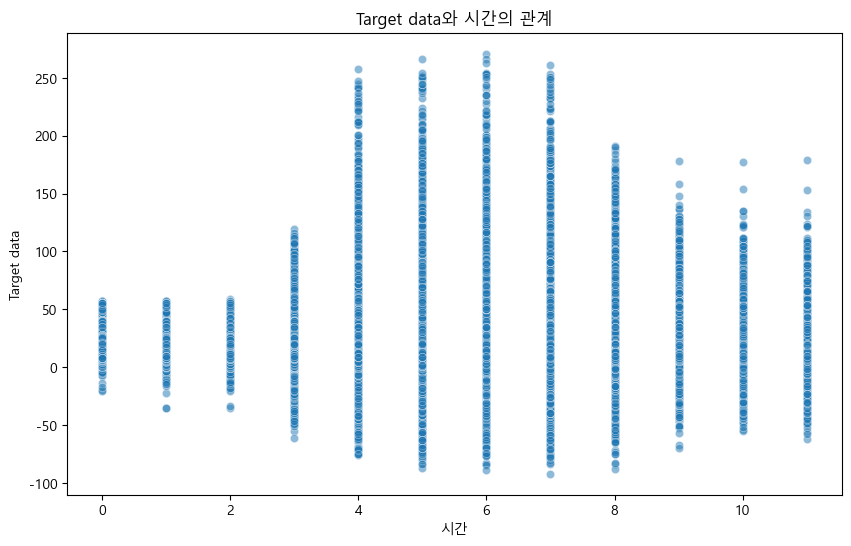

In [49]:
# 시간에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['time'], y=df['target data'], alpha=0.5)
plt.title('Target data와 시간의 관계')
plt.xlabel('시간')
plt.ylabel('Target data')
plt.show()

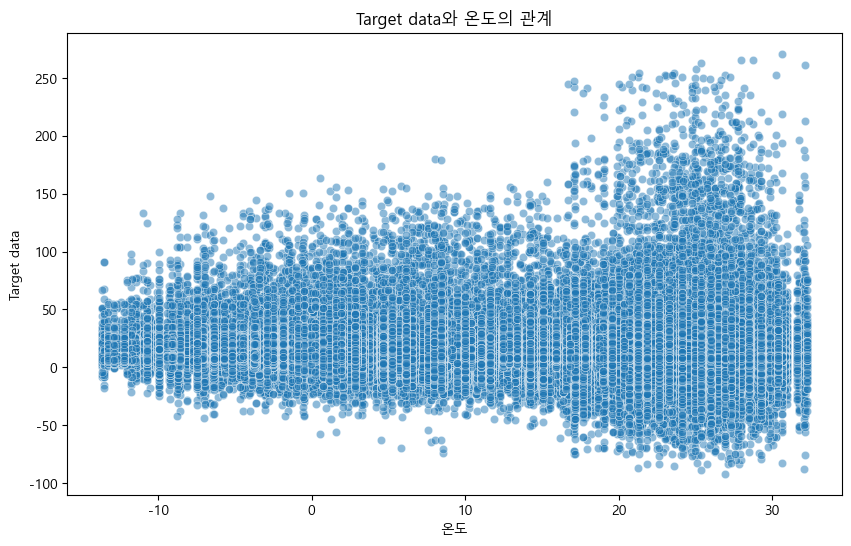

In [50]:
# 온도에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temp'], y=df['target data'], alpha=0.5)
plt.title('Target data와 온도의 관계')
plt.xlabel('온도')
plt.ylabel('Target data')
plt.show()

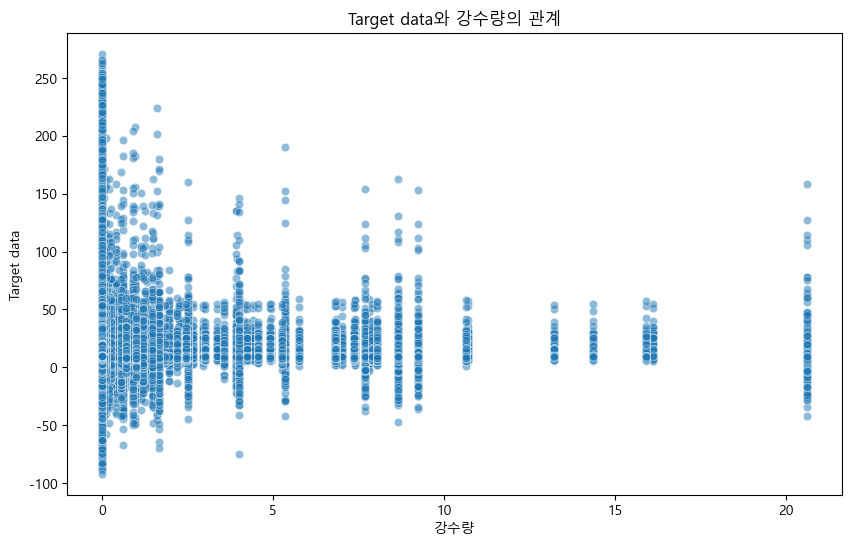

In [51]:
# 강수량에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['prec'], y=df['target data'], alpha=0.5)
plt.title('Target data와 강수량의 관계')
plt.xlabel('강수량')
plt.ylabel('Target data')
plt.show()

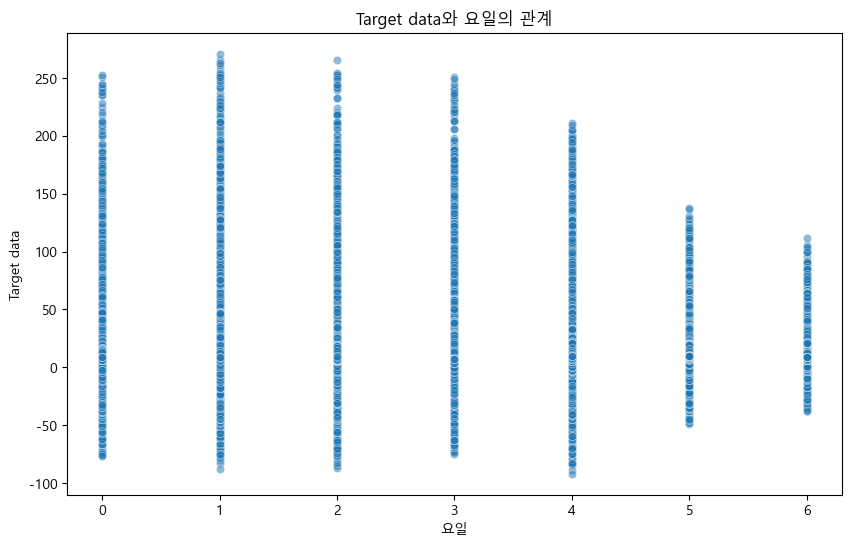

In [52]:
# 요일에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['day'], y=df['target data'], alpha=0.5)
plt.title('Target data와 요일의 관계')
plt.xlabel('요일')
plt.ylabel('Target data')

#plt.xticks([0, 1, 2, 3])

plt.show()

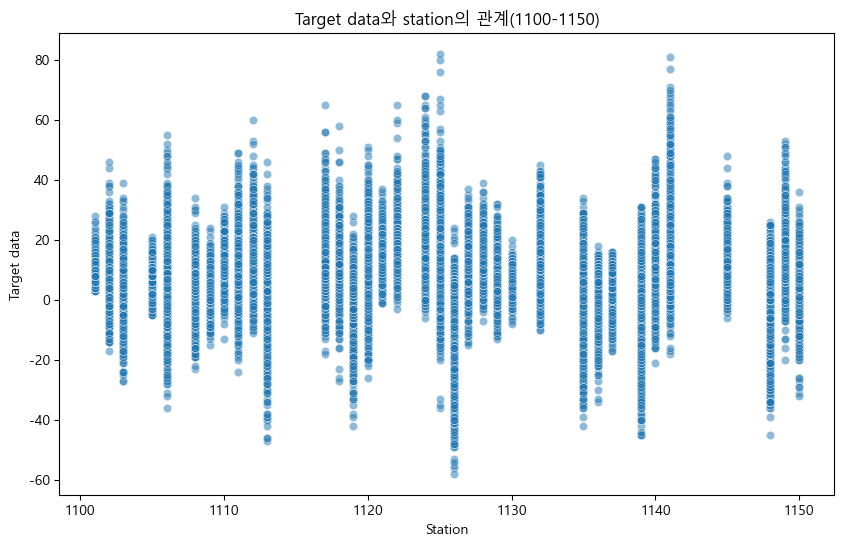

In [53]:
# 데이터 필터링: station이 1000에서 1500 사이인 데이터만 선택
df1 = df[(df['station'] >= 1100) & (df['station'] <= 1150)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['target data'], alpha=0.5)
plt.title('Target data와 station의 관계(1100-1150)')
plt.xlabel('Station')
plt.ylabel('Target data')

plt.show()

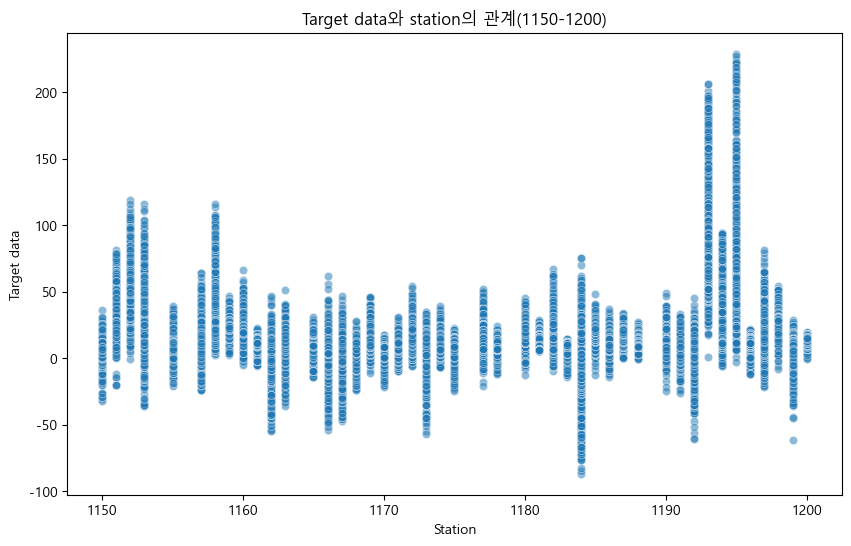

In [54]:
# 데이터 필터링: station이 1000에서 1500 사이인 데이터만 선택
df1 = df[(df['station'] >= 1150) & (df['station'] <= 1200)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['target data'], alpha=0.5)
plt.title('Target data와 station의 관계(1150-1200)')
plt.xlabel('Station')
plt.ylabel('Target data')

plt.show()

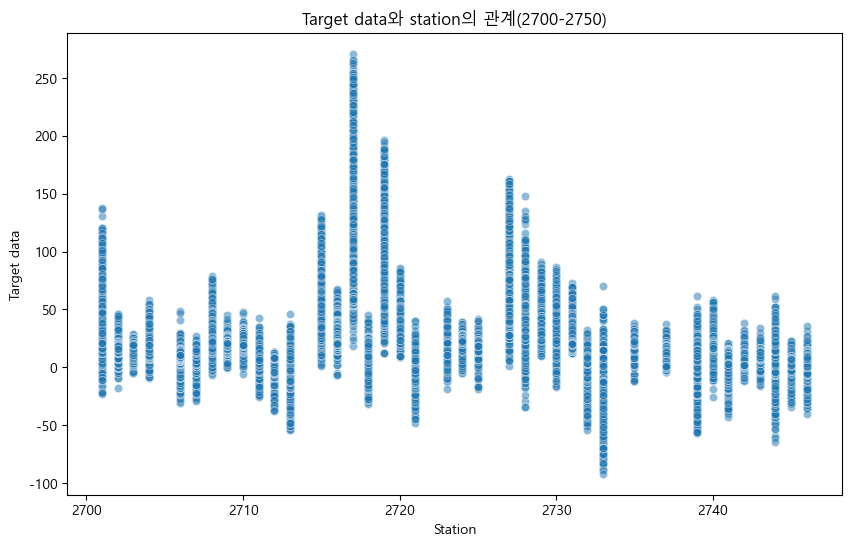

In [55]:
df1 = df[(df['station'] >= 2700) & (df['station'] <= 2750)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['target data'], alpha=0.5)
plt.title('Target data와 station의 관계(2700-2750)')
plt.xlabel('Station')
plt.ylabel('Target data')

plt.show()

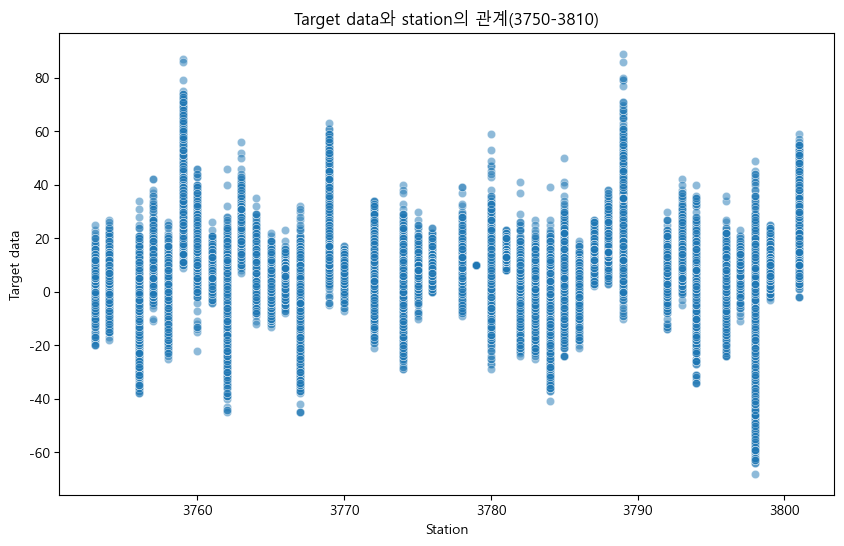

In [56]:
df1 = df[(df['station'] >= 3750) & (df['station'] <= 3810)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['target data'], alpha=0.5)
plt.title('Target data와 station의 관계(3750-3810)')
plt.xlabel('Station')
plt.ylabel('Target data')

plt.show()

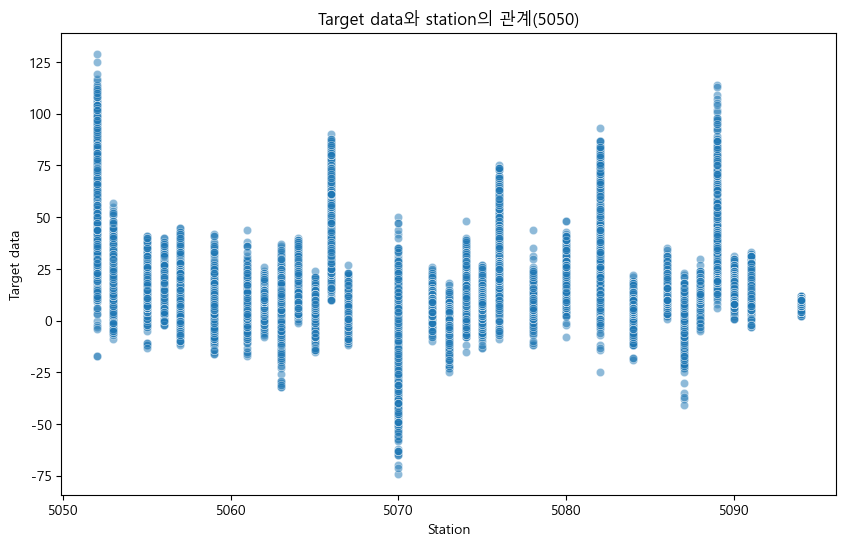

In [57]:
df1 = df[(df['station'] >= 5050) & (df['station'] <= 5100)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['target data'], alpha=0.5)
plt.title('Target data와 station의 관계(5050)')
plt.xlabel('Station')
plt.ylabel('Target data')

plt.show()

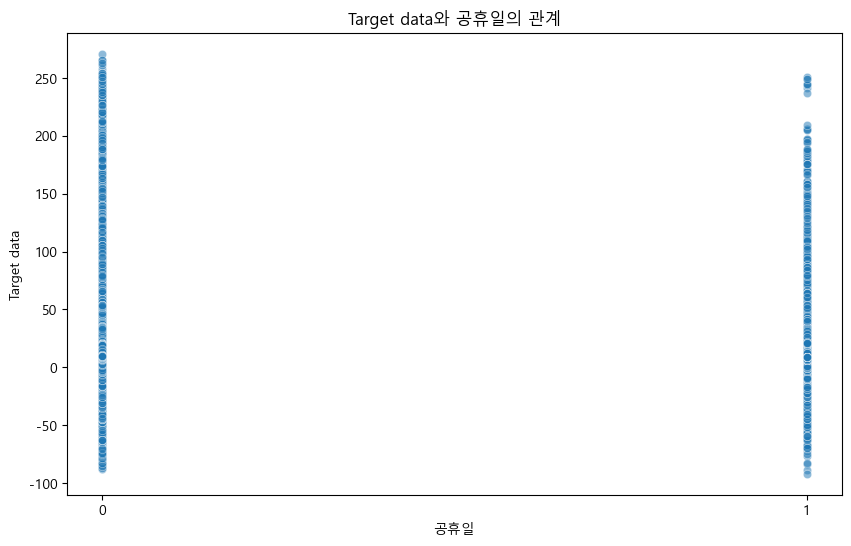

In [58]:
# 공휴일에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['holiday'], y=df['target data'], alpha=0.5)
plt.title('Target data와 공휴일의 관계')
plt.xlabel('공휴일')
plt.ylabel('Target data')

plt.xticks([0, 1])

plt.show()

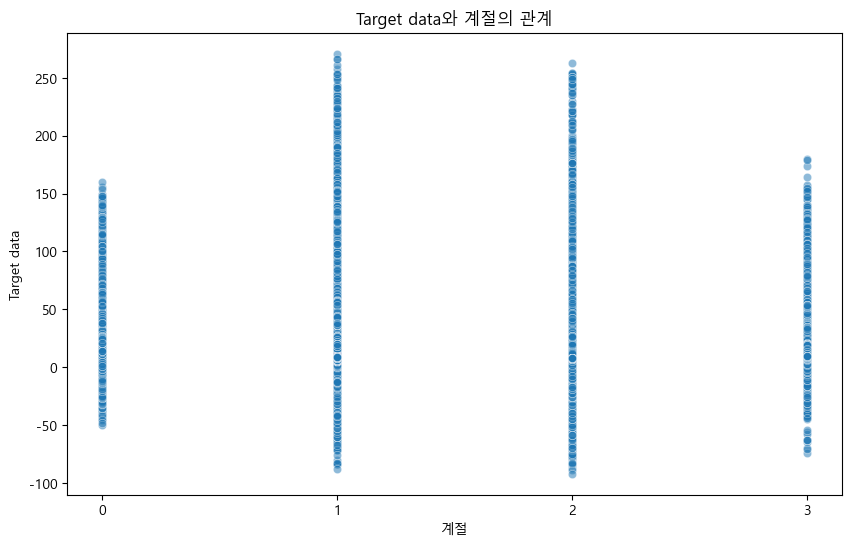

In [59]:
# 계절에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['season'], y=df['target data'], alpha=0.5)
plt.title('Target data와 계절의 관계')
plt.xlabel('계절')
plt.ylabel('Target data')

plt.xticks([0, 1, 2, 3])

plt.show()

# 속성과 대여량 사이의 산점도

In [78]:
df = pd.read_csv('final_dfing.csv')

df = df[['date', 'time', 'station', 'temp', 'prec', 'holiday', 'season', 'day', '대여량']]

df.head()

,date,time,station,temp,prec,holiday,season,day,대여량
0,2022-03-01,0,1101,7.10,0.00,1,0,1,0.0
1,2022-03-01,1,1101,7.20,0.00,1,0,1,0.0
2,2022-03-01,2,1101,6.25,0.00,1,0,1,0.0
3,2022-03-01,3,1101,5.70,0.85,1,0,1,0.0
4,2022-03-01,4,1101,5.85,0.30,1,0,1,0.0


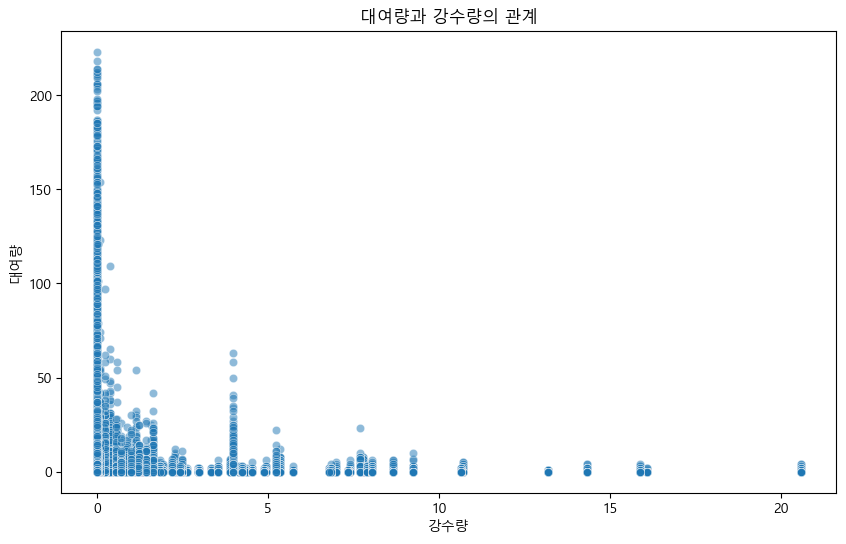

In [79]:
# 강수량에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['prec'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 강수량의 관계')
plt.xlabel('강수량')
plt.ylabel('대여량')
plt.show()

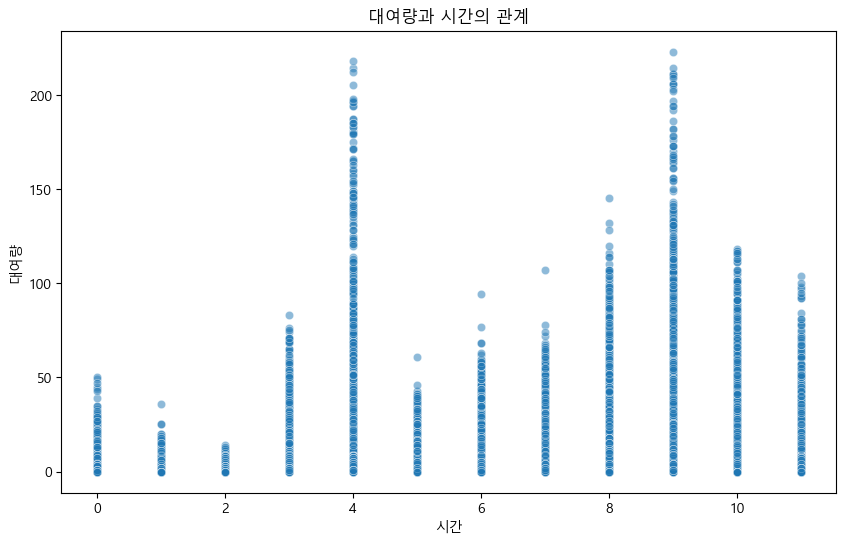

In [64]:
# 시간에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['time'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 시간의 관계')
plt.xlabel('시간')
plt.ylabel('대여량')
plt.show()

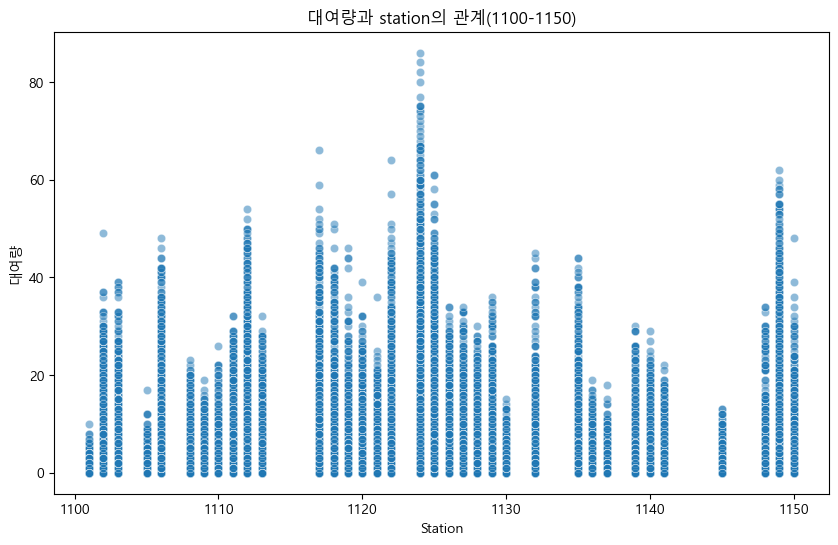

In [65]:
# 데이터 필터링
df1 = df[(df['station'] >= 1100) & (df['station'] <= 1150)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['대여량'], alpha=0.5)
plt.title('대여량과 station의 관계(1100-1150)')
plt.xlabel('Station')
plt.ylabel('대여량')

plt.show()

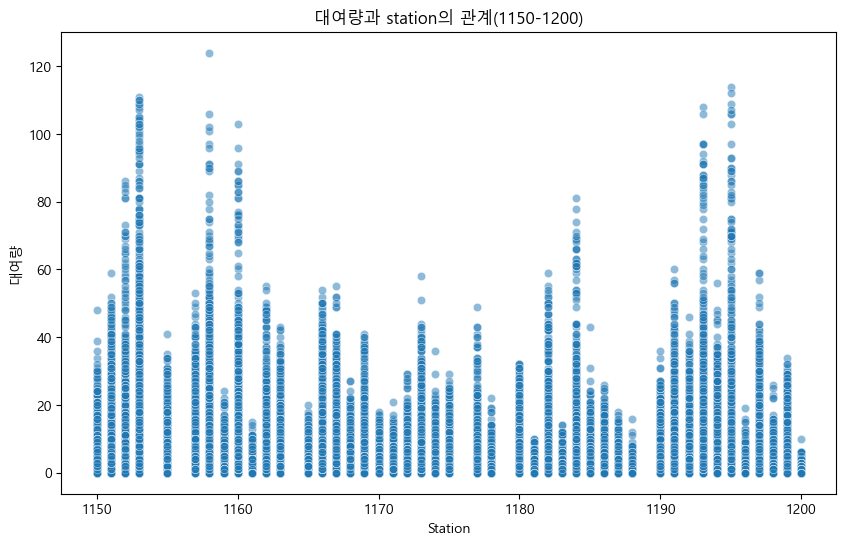

In [66]:
df1 = df[(df['station'] >= 1150) & (df['station'] <= 1200)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['대여량'], alpha=0.5)
plt.title('대여량과 station의 관계(1150-1200)')
plt.xlabel('Station')
plt.ylabel('대여량')

plt.show()

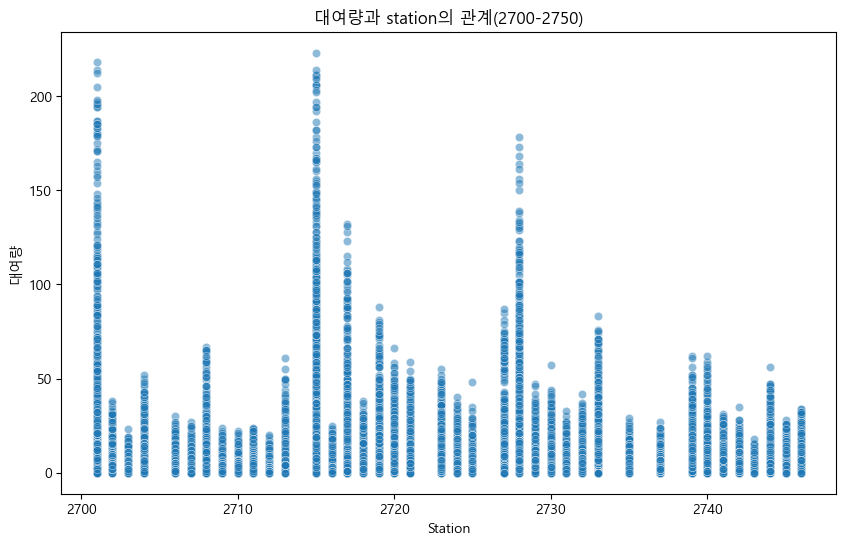

In [67]:
df1 = df[(df['station'] >= 2700) & (df['station'] <= 2750)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['대여량'], alpha=0.5)
plt.title('대여량과 station의 관계(2700-2750)')
plt.xlabel('Station')
plt.ylabel('대여량')

plt.show()

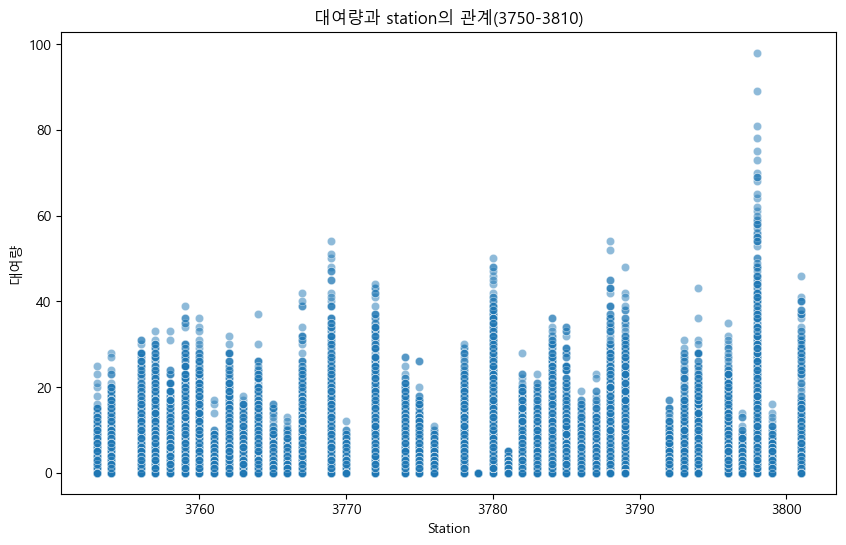

In [68]:
df1 = df[(df['station'] >= 3750) & (df['station'] <= 3810)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['대여량'], alpha=0.5)
plt.title('대여량과 station의 관계(3750-3810)')
plt.xlabel('Station')
plt.ylabel('대여량')

plt.show()

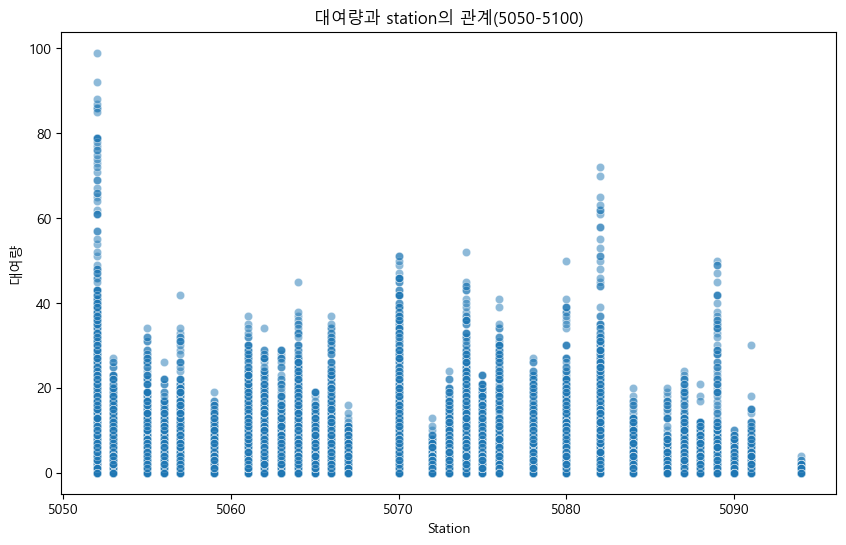

In [69]:
df1 = df[(df['station'] >= 5050) & (df['station'] <= 5100)]

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['station'], y=df1['대여량'], alpha=0.5)
plt.title('대여량과 station의 관계(5050-5100)')
plt.xlabel('Station')
plt.ylabel('대여량')

plt.show()

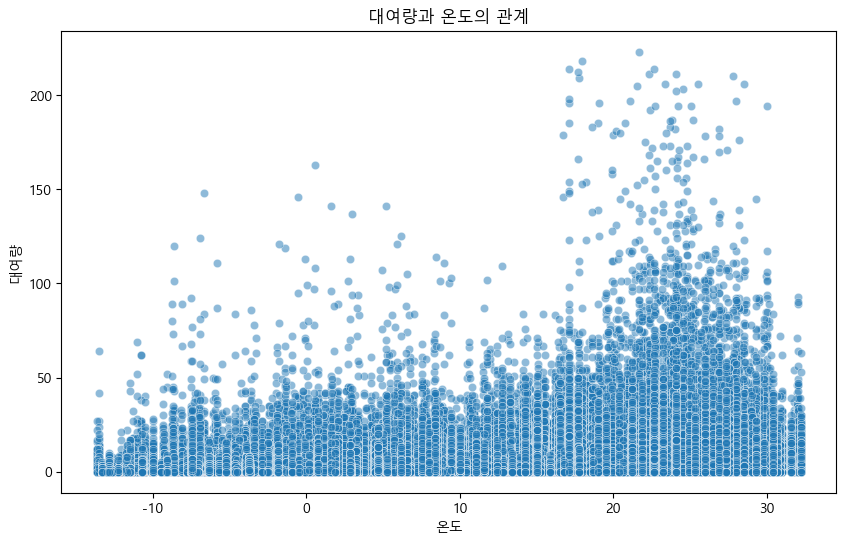

In [70]:
# 온도에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temp'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 온도의 관계')
plt.xlabel('온도')
plt.ylabel('대여량')
plt.show()

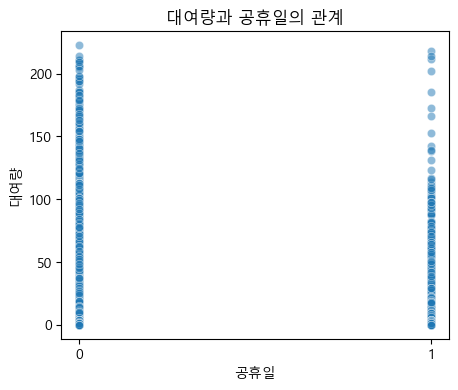

In [71]:
# 공휴일에 대한 산점도 그리기
plt.figure(figsize=(5, 4))
sns.scatterplot(x=df['holiday'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 공휴일의 관계')
plt.xlabel('공휴일')
plt.ylabel('대여량')

plt.xticks([0, 1])

plt.show()

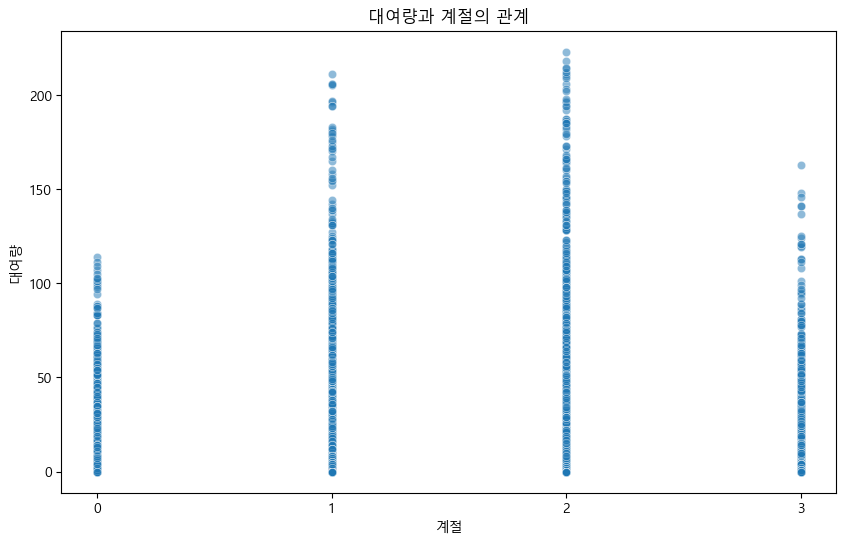

In [72]:
# 계절에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['season'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 계절의 관계')
plt.xlabel('계절')
plt.ylabel('대여량')

plt.xticks([0, 1, 2, 3])

plt.show()

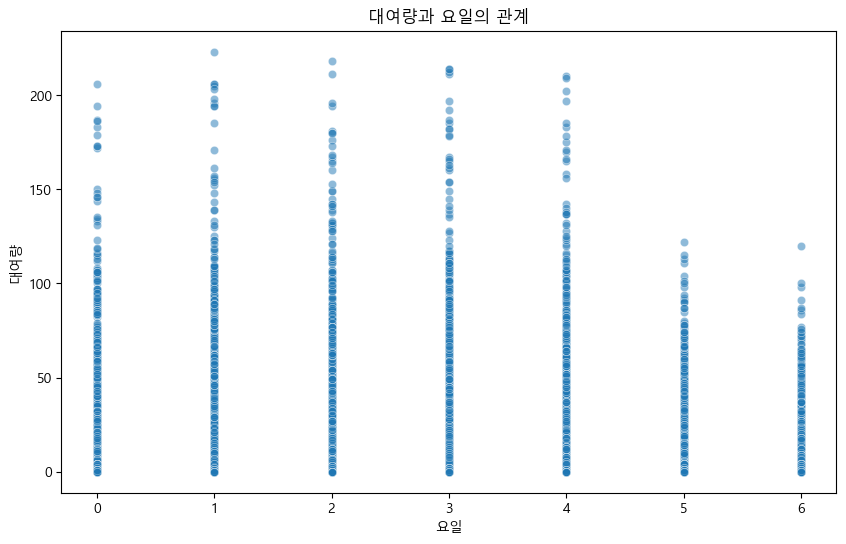

In [73]:
# 요일에 대한 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['day'], y=df['대여량'], alpha=0.5)
plt.title('대여량과 요일의 관계')
plt.xlabel('요일')
plt.ylabel('대여량')

#plt.xticks([0, 1, 2, 3])

plt.show()

# 상관관계 히트맵 뽑기

In [80]:
df = pd.read_csv('scaled database.csv')

df = df[['date', 'time', 'station', 'temp', 'prec', 'holiday', 'season', 'day', 'target data']]

df.head()

,date,time,station,temp,prec,holiday,season,day,target data
0,301,0,1101,7.10,0.00,1,0,1,10.0
1,301,1,1101,7.20,0.00,1,0,1,10.0
2,301,2,1101,6.25,0.00,1,0,1,10.0
3,301,3,1101,5.70,0.85,1,0,1,10.0
4,301,4,1101,5.85,0.30,1,0,1,10.0


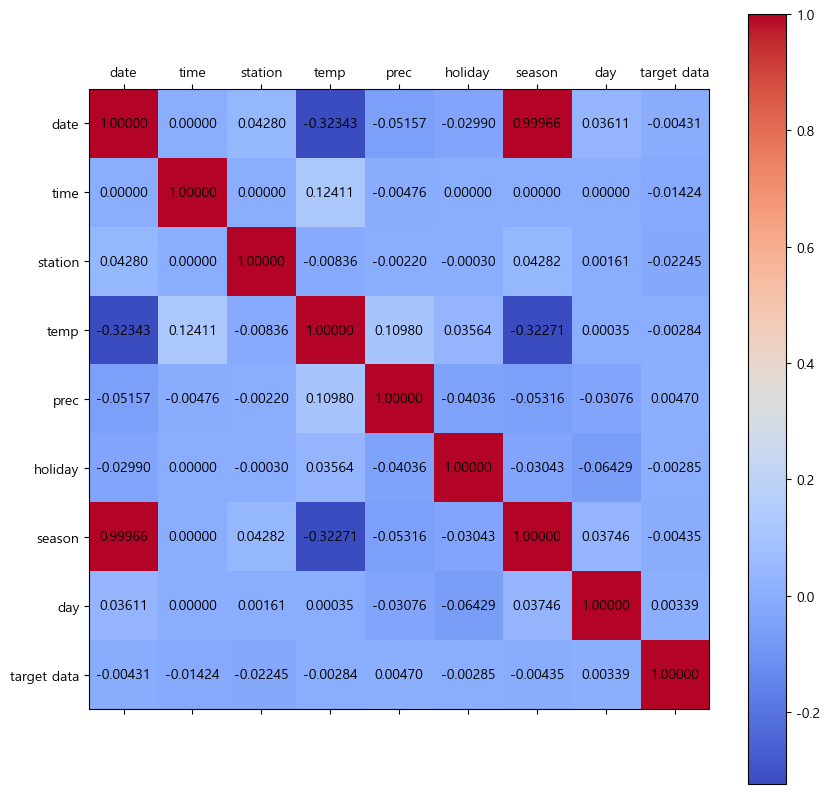

In [81]:
# 상관 행렬 계산
corr_matrix = df.corr()

# 원형 상관 플롯 그리기
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# 컬러바 추가
fig.colorbar(cax)

# 축 레이블 설정
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# 상관계수 값 표시
for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f'{val:.5f}', ha='center', va='center', color='black')

plt.show()

# 최종 데이터 모델 학습

In [82]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

## train/test set split

In [83]:
# 시계열 데이터 모델 학습을 위해 train/test set에 모든 날짜가 골고루 포함되도록 함
grouped = df.groupby('date')

train_list = []
test_list = []

for name, group in grouped:
    X = group.iloc[:, :-1].values
    y = group['target data'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)
    
    train_list.append(pd.DataFrame(X_train, columns=df.columns[:-1]).assign(target_data=y_train))
    test_list.append(pd.DataFrame(X_test, columns=df.columns[:-1]).assign(target_data=y_test))

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)

## random forest & k-fold 교차 검증

In [84]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df['target_data'].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df['target_data'].values

'''
n_estimators -> 결정트리 개수
criterion -> 분할기준. default가 sqrerror
max_depth
max_features -> 노트 분할시 특성의 무작위 하위 집합, 크면 과적합. 
min_samples_split -> default = 2, 분할 전 최소 개수
min_samples_leaf -> default = 1, 분할 후, 리프 노드의 최소 개수
n_jobs -> default = -1, 병렬 작업수, 많으면 예측 속도 빨라짐, -1이면 다씀!

'''

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=123,
                               n_jobs=-1)
forest.fit(X_train, y_train)

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=123)

train_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
test_scores = cross_val_score(forest, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')


train_scores = -train_scores
test_scores = -test_scores


print('평균 훈련 MSE: %.3f, 평균 테스트 MSE: %.3f' % (train_scores.mean(), test_scores.mean()))


train_r2_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='r2')
test_r2_scores = cross_val_score(forest, X_test, y_test, cv=kf, scoring='r2')

print('평균 훈련 R^2: %.3f, 평균 테스트 R^2: %.3f' % (train_r2_scores.mean(), test_r2_scores.mean()))

평균 훈련 MSE: 40.318, 평균 테스트 MSE: 44.329
평균 훈련 R^2: 0.877, 평균 테스트 R^2: 0.869


## 특성 중요도 시각화

Feature importances:
station: 0.5787609917571397
time: 0.13937048647996
temp: 0.09606400918001032
date: 0.08288635583605276
day: 0.07804434904348212
prec: 0.013523287568883309
holiday: 0.007371378192142094
season: 0.003979141942329768


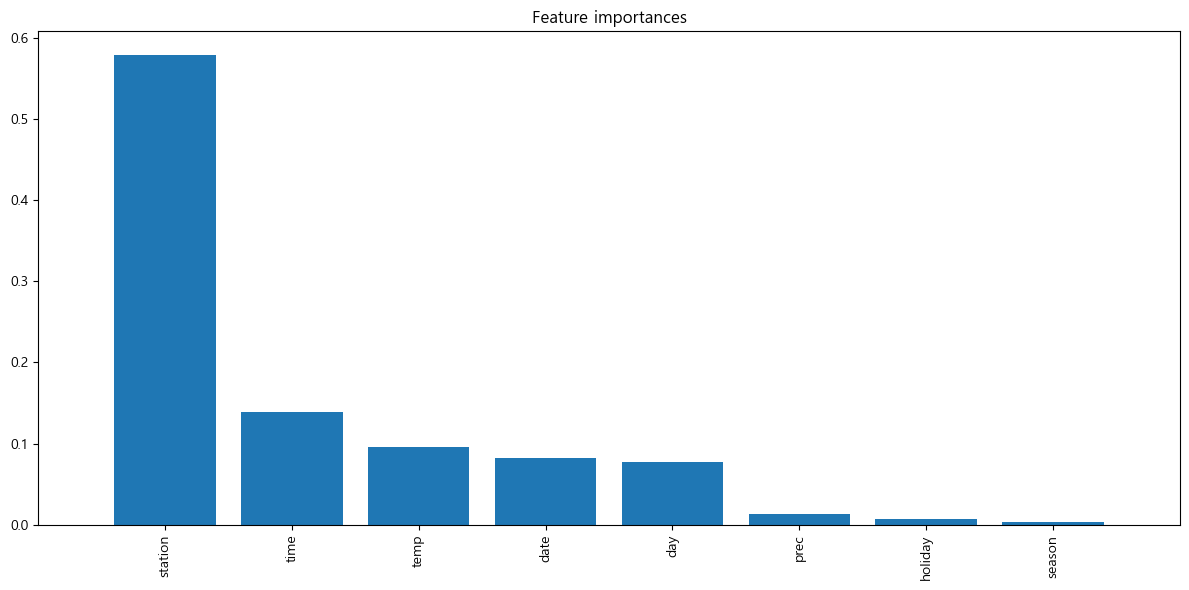

In [85]:
# 상관 관계가 없는 데이터를 학습 시켰으므로, 모델 학습의 특성 중요도를 추출함
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = df.columns[:-1]

print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 잔차 그래프

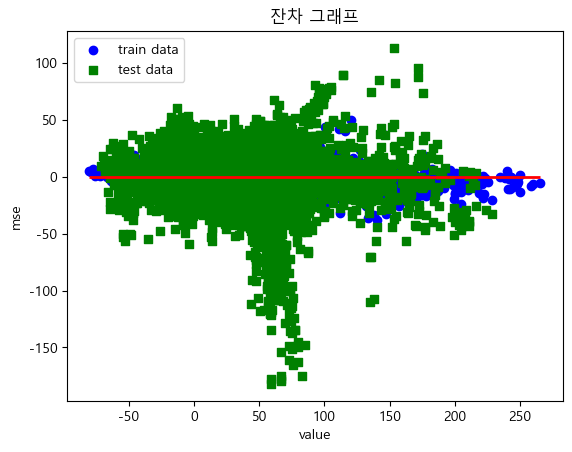

In [86]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 훈련 데이터의 잔차 그래프
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='blue', marker='o', label='train data')
# 테스트 데이터의 잔차 그래프
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='green', marker='s', label='test data')

plt.xlabel('value')
plt.ylabel('mse')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='red', lw=2)
plt.title('잔차 그래프')
plt.show()

## 다항 회귀 모델 학습

In [ ]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df['target_data'].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df['target_data'].values

# KFold 설정
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=123)

# 다양한 차수에 대해 모델 평가
degrees = [1, 2, 3, 4, 5]
train_mse_scores = []
test_mse_scores = []
train_r2_scores = []
test_r2_scores = []

for degree in degrees:
    pipeline = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    pipeline.fit(X_train, y_train)
    
    train_mse = -cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    test_mse = -cross_val_score(pipeline, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean()
    train_r2 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2').mean()
    test_r2 = cross_val_score(pipeline, X_test, y_test, cv=kf, scoring='r2').mean()
    
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# 결과 출력
for i, degree in enumerate(degrees):
    print(f"Degree {degree} - 평균 훈련 MSE: {train_mse_scores[i]:.3f}, 평균 테스트 MSE: {test_mse_scores[i]:.3f}")
    print(f"Degree {degree} - 평균 훈련 R^2: {train_r2_scores[i]:.3f}, 평균 테스트 R^2: {test_r2_scores[i]:.3f}")

## gridsearch 코드

In [ ]:
forest_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 1000],
    'min_samples_leaf': [1, 20],
    'min_samples_split': [2, 20]
}

forest_grid = GridSearchCV(estimator = forest_reg,
                           param_gridh 
                           = param_grid,
                           cv = 5,
                           n_jobs = -1)

forest_grid.fit(X_train, y_train)

print('최적의 매개변수: %s' % grid.best_params_)

In [ ]:
forest_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [1000, 2000],
    'min_samples_leaf': [2, 10],
    'min_samples_split': [2, 10]
}

forest_grid = GridSearchCV(estimator = forest_reg,
                           param_gridh 
                           = param_grid,
                           cv = 5,
                           n_jobs = -1)

forest_grid.fit(X_train, y_train)

print('최적의 매개변수: %s' % grid.best_params_)

## 하이퍼 파라미터 최적화 코드 비교

In [105]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df['target_data'].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df['target_data'].values

'''
n_estimators -> 결정트리 개수
criterion -> 분할기준. default가 sqrerror
max_depth
max_features -> 노트 분할시 특성의 무작위 하위 집합, 크면 과적합. 
min_samples_split -> default = 2, 분할 전 최소 개수
min_samples_leaf -> default = 1, 분할 후, 리프 노드의 최소 개수
n_jobs -> default = -1, 병렬 작업수, 많으면 예측 속도 빨라짐, -1이면 다씀!

'''

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=123,
                               n_jobs=-1, 
                               min_samples_leaf=10,
                               min_samples_split=10)
forest.fit(X_train, y_train)

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=123)

train_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
test_scores = cross_val_score(forest, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')


train_scores = -train_scores
test_scores = -test_scores


print('평균 훈련 MSE: %.3f, 평균 테스트 MSE: %.3f' % (train_scores.mean(), test_scores.mean()))


train_r2_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='r2')
test_r2_scores = cross_val_score(forest, X_test, y_test, cv=kf, scoring='r2')

print('평균 훈련 R^2: %.3f, 평균 테스트 R^2: %.3f' % (train_r2_scores.mean(), test_r2_scores.mean()))

평균 훈련 MSE: 44.573, 평균 테스트 MSE: 47.606
평균 훈련 R^2: 0.864, 평균 테스트 R^2: 0.860


## 선형/비선형 관계 시각화

Training MSE: 4.926508344356147
Test MSE: 59.25888708468047
Training R²: 0.9849346426477735
Test R²: 0.8254375040645552


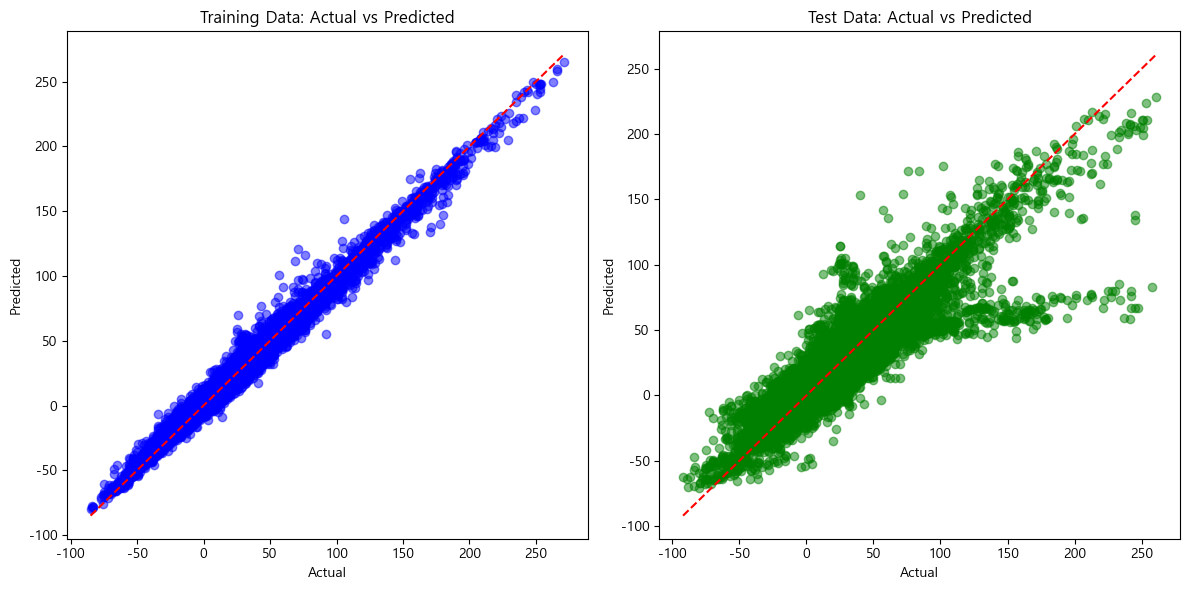

In [87]:
# 예측
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

# 모델 성능 평가
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Training R²: {r2_train}')
print(f'Test R²: {r2_test}')

# 실제 값과 예측 값 비교 (산점도)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')

plt.tight_layout()
plt.show()

# 비교 데이터 모델 예측

In [88]:
df = pd.read_csv('final_dfing.csv')

In [89]:
# time을 기준으로 대여량 합침
aggregated_data = df.groupby(['date', 'time']).agg({'대여량': 'sum','temp': 'first','prec': 'first', 'holiday': 'first', 'season': 'first', 'day': 'first'}).reset_index()

aggregated_data.rename(columns={'대여량': 'target'}, inplace=True)

In [91]:
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
aggregated_data['date'] = aggregated_data['date'].dt.month * 100 + aggregated_data['date'].dt.day

In [92]:
aggregated_data

,date,time,target,temp,prec,holiday,season,day
0,301,0,132.0,7.10,0.00,1,0,1
1,301,1,39.0,7.20,0.00,1,0,1
2,301,2,17.0,6.25,0.00,1,0,1
3,301,3,64.0,5.70,0.85,1,0,1
4,301,4,229.0,5.85,0.30,1,0,1
...,...,...,...,...,...,...,...,...
1459,1231,7,709.0,1.60,0.00,0,3,5
1460,1231,8,748.0,1.90,0.00,0,3,5
1461,1231,9,590.0,0.20,0.00,0,3,5
1462,1231,10,439.0,-0.90,0.00,0,3,5


## 상관관계 분석표 뽑기

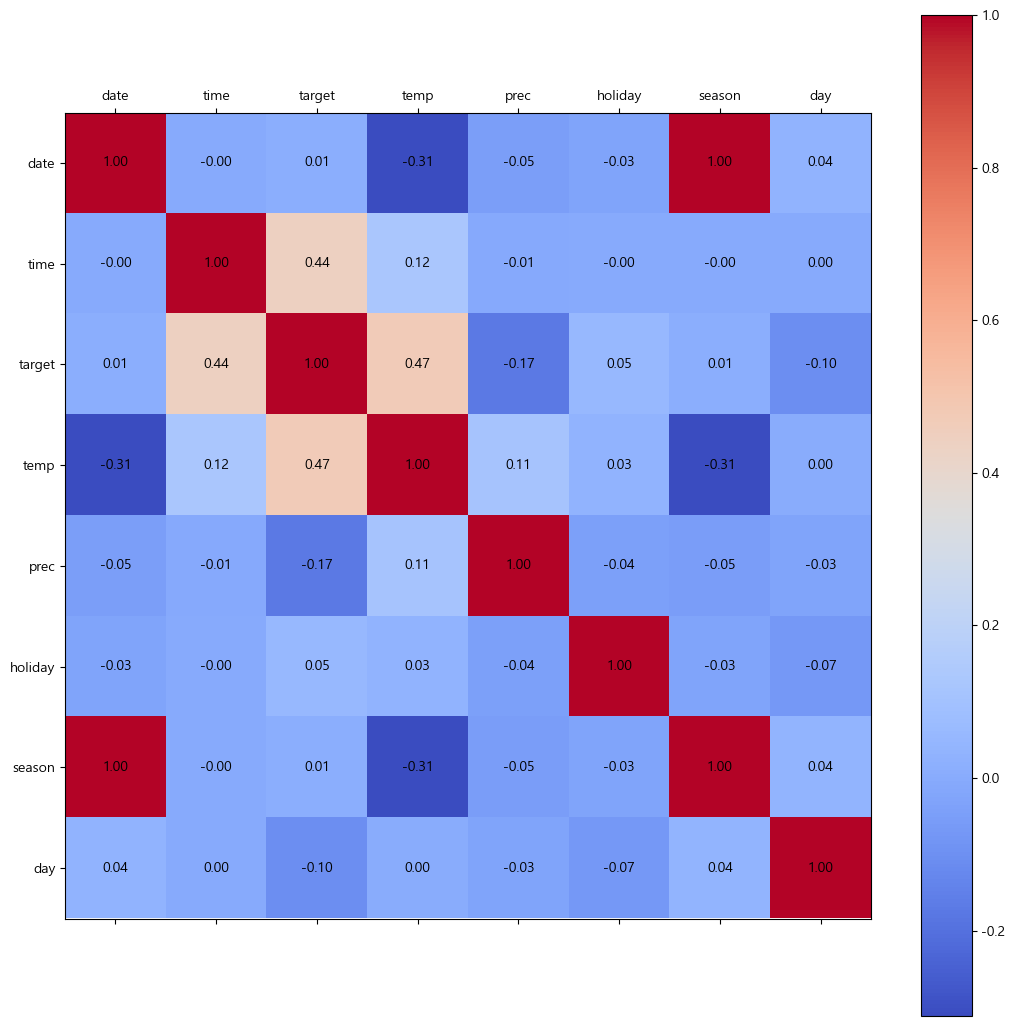

In [93]:
corr_matrix =aggregated_data.corr()

fig, ax = plt.subplots(figsize=(13,13))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

fig.colorbar(cax)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

for (i, j), val in np.ndenumerate(corr_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.show()

## 모델 학습

In [ ]:
df = aggregated_data

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

model = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=123,
                               n_jobs=-1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('평균 훈련 RMSE: %.3f, 평균 테스트 RMSE: %.3f' % (rmse_train, rmse_test))
print('평균 훈련 R^2: %.3f, 평균 테스트 R^2: %.3f' % (r2_train, r2_test))

## 특성 중요도 추출

In [ ]:
# 특성 중요도 계산
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = df.columns[:-1]

# 특성 중요도 출력
print("Feature importances:")
for f in range(X_train.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 잔차 그래프 추출

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 훈련 데이터의 잔차 그래프
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='blue', marker='o', label='train data')
# 테스트 데이터의 잔차 그래프
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='green', marker='s', label='test data')

plt.xlabel('value')
plt.ylabel('mse')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='red', lw=2)
plt.title('잔차 그래프')
plt.show()

# 트럭 적재량 예측 시스템

In [94]:
import requests
import xml.etree.ElementTree as ET
from datetime import datetime
import pandas as pd
import holidays
import math

In [95]:
#API 키
bike_API = '72686448736c6169313034767865726e'
weather_API = '1GNTp4D4BZZOWAhw6weJAUz18kyc1l6McGwIoBcSxWu3PI1YT9I0TkrT5UQAA9fzeViB%2F2JGXutLS8ndAtVSng%3D%3D'

#데이터프레임 제작 함수
def make_X(n):
    # 강서구 대여소 정리
    df_master = pd.read_csv('./공공자전거 대여소 정보(22.12월 기준).csv')
    df_master = df_master.iloc[4:, :7]
    df_master.columns = ['대여소 번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치 시기']
    df_master = df_master[df_master['자치구'] == '강서구']
    kangseo_list = df_master['대여소 번호'].astype(str).unique()
    kangseo_list_int = df_master['대여소 번호'].astype(int).unique()
    
    if n not in kangseo_list_int:
        print("강서구 내의 대여소가 아닙니다")
        return None
    
    # 실시간 대여소별 따릉이 거치 대수
    response_data_11 = requests.get(f'http://openapi.seoul.go.kr:8088/{bike_API}/json/bikeList/745/824')
    bike_11 = response_data_11.json()
    bike_infos_11 = bike_11['rentBikeStatus']['row']

    response_data_27 = requests.get(f'http://openapi.seoul.go.kr:8088/{bike_API}/json/bikeList/1698/1737')
    bike_27 = response_data_27.json()
    bike_infos_27 = bike_27['rentBikeStatus']['row']

    response_data_37 = requests.get(f'http://openapi.seoul.go.kr:8088/{bike_API}/json/bikeList/1997/2037')
    bike_37 = response_data_37.json()
    bike_infos_37 = bike_37['rentBikeStatus']['row']

    response_data_50 = requests.get(f'http://openapi.seoul.go.kr:8088/{bike_API}/json/bikeList/2598/2628')
    bike_50 = response_data_50.json()
    bike_infos_50 = bike_50['rentBikeStatus']['row']
    
    filtered_bike_infos = []
    bike_infos_list = [bike_infos_11, bike_infos_27, bike_infos_37, bike_infos_50]

    for bike_infos in bike_infos_list:
        for info in bike_infos:
            if isinstance(info, dict):
                filtered_info = {
                    'stationName': info.get('stationName', 'N/A'),
                    'parkingBikeTotCnt': info.get('parkingBikeTotCnt', 'N/A')}
                filtered_bike_infos.append(filtered_info)
                
    info_df = pd.DataFrame(filtered_bike_infos)
    info_df['station'] = info_df['stationName'].str[:4]
    info_df.drop(columns=['stationName'], inplace=True)
    info_df = info_df[info_df['station'].isin(kangseo_list)]
    info_df = info_df.astype(int)
    
    if n not in info_df['station'].unique():
        print('강서구 내의 대여소지만, 실시간 정보가 없습니다')
        return None
    
    tmp_X = pd.DataFrame(0, index=[0], columns=['date', 'time', 'station', 'temp', 'prec', 'holiday', 'season', 'day', 'current'])

    now = datetime.now()

    curr_month = now.month
    curr_day = now.strftime('%d')
    curr_date = str(curr_month) + curr_day
    tmp_X.loc[0, 'date'] = curr_date

    curr_hour = now.hour
    curr_time = curr_hour // 2
    tmp_X.loc[0, 'time'] = curr_time

    kr_holidays = holidays.KR()
    if now.date() in kr_holidays:
        tmp_X.loc[0, 'holiday'] = 1

    if curr_month in [6, 7, 8]:
        tmp_X.loc[0, 'season'] = 1  # 여름
    elif curr_month in [9, 10, 11]:
        tmp_X.loc[0, 'season'] = 2  # 가을
    elif curr_month in [12, 1, 2]:
        tmp_X.loc[0, 'season'] = 3  # 겨울

    curr_yo = now.weekday()
    tmp_X.loc[0, 'day'] = curr_yo

    # 실시간 기상 데이터 
    curr_date_wea = now.strftime('%Y%m%d')
    curr_time_wea =  now.strftime('%H00')

    url = 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst'
    params = {'serviceKey': weather_API , 
              'pageNo': '1', 
              'numOfRows': '1000', 
              'dataType': 'XML', 
              'base_date': curr_date_wea, 
              'base_time': curr_time_wea, 
              'nx': '55', 
              'ny': '127'}

    response = requests.get(url, params=params)
    root = ET.fromstring(response.content)

    for item in root.findall('.//item'):
        category = item.find('category').text
        obsrValue = item.find('obsrValue').text

        if category == 'T1H':  # 기온 코드
            tmp_X.loc[0, 'temp'] = obsrValue
        elif category == 'RN1':  # 강수량 코드
            tmp_X.loc[0, 'prec'] = obsrValue
                
    
    tmp_X.loc[0, 'station'] = n
    tmp_X.loc[0, 'current'] = info_df[info_df['station']==n]['parkingBikeTotCnt'].item()
    
    tmp_X[['date', 'time', 'station', 'holiday', 'season', 'day', 'current']] = tmp_X[['date', 'time', 'station', 'holiday', 'season', 'day', 'current']].astype(int)
    tmp_X[['temp', 'prec']] = tmp_X[['temp', 'prec']].astype(float)
    
    return tmp_X

#프로그램 실행 함수
def programm(num):
    currX = make_X(num)

    if currX.empty:
        return
    
    # 예측 회귀모델 이름 forest로 정의, 바뀔 경우 아래 코드만 바꿔주시면 됩니당
    curr_pred = forest.predict(currX.iloc[:, :-1]) 
    
    opt_num = math.ceil(curr_pred) #적정 거치량 올림
    curr_num = currX['current'].item()
    move_num = curr_num - opt_num

    print(f"\n{currX['station'].item()}번 대여소의 적정 거치대수는 {opt_num}대, 현재 거치대수는 {curr_num}대 입니다.\n")
    if (move_num > 0):
        print(f"{move_num}대를 트럭에 실어주세요")
    elif (move_num == 0):
        print("분배할 필요가 없습니다")
    else:
        print(f"{abs(move_num)}대를 대여소에 채워주세요.")

In [104]:
station_num = int(input("대여소 번호를 입력하세요: "))
programm(station_num)

대여소 번호를 입력하세요: 2701

2701번 대여소의 적정 거치대수는 46대, 현재 거치대수는 49대 입니다.

3대를 트럭에 실어주세요


C:\Users\Owner\anaconda3\envs\2024-DS\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\Owner\AppData\Local\Temp\ipykernel_13460\4197536678.py:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  opt_num = math.ceil(curr_pred) #적정 거치량 올림
